In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train.csv
User uploaded file "train.csv" with length 912447 bytes


In [71]:
df = pd.read_csv('train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          11030 non-null  int64  
 1   Name          11030 non-null  object 
 2   Platform      11030 non-null  object 
 3   Year          10857 non-null  float64
 4   Genre         11030 non-null  object 
 5   Publisher     10990 non-null  object 
 6   NA_Sales      11030 non-null  float64
 7   EU_Sales      11030 non-null  float64
 8   JP_Sales      11030 non-null  float64
 9   Other_Sales   11030 non-null  float64
 10  Global_Sales  11030 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 948.0+ KB


In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
1,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
2,4027,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49
3,6319,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27
4,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24


In [6]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            173
Genre             0
Publisher        40
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
col = ['Rank', 'Name', 'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Global_Sales']

In [ ]:
for ele in df.columns:
  if ele not in col:
    print(ele)
    print(df[ele].value_counts())

Platform
DS      1454
PS2     1444
Wii      899
PS3      867
X360     835
PSP      806
PS       797
PC       648
GBA      558
XB       555
GC       355
3DS      341
PSV      285
PS4      214
N64      199
SNES     142
XOne     142
SAT      120
WiiU      98
2600      80
GB        65
NES       56
DC        32
GEN       19
NG         5
WS         5
SCD        4
3DO        3
TG16       2
Name: Platform, dtype: int64
Year
2008.0    956
2009.0    951
2010.0    834
2007.0    813
2011.0    784
2006.0    656
2005.0    609
2002.0    543
2003.0    536
2004.0    524
2012.0    452
2015.0    420
2014.0    378
2013.0    354
2001.0    313
1998.0    247
1999.0    228
2000.0    228
2016.0    226
1997.0    208
1996.0    176
1995.0    130
1994.0     81
1993.0     35
1981.0     31
1992.0     26
1982.0     21
1991.0     17
1986.0     14
1990.0     10
1989.0      9
1988.0      9
1987.0      9
1985.0      9
1983.0      8
1984.0      6
1980.0      5
2017.0      1
Name: Year, dtype: int64
Genre
Action          2

In [7]:
df['Year'].describe()

count    10857.000000
mean      2006.479783
std          5.734402
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2017.000000
Name: Year, dtype: float64

In [80]:
sp.stats.mode(df['Year'])[0][0]

2008.0

In [82]:
df['Year'] = df['Year'].fillna(sp.stats.mode(df['Year'])[0][0])

In [83]:
df['Publisher'] = df['Publisher'].fillna(sp.stats.mode(df['Publisher'])[0][0])

In [84]:
df['Year'] .value_counts()

2008.0    1129
2009.0     951
2010.0     834
2007.0     813
2011.0     784
2006.0     656
2005.0     609
2002.0     543
2003.0     536
2004.0     524
2012.0     452
2015.0     420
2014.0     378
2013.0     354
2001.0     313
1998.0     247
1999.0     228
2000.0     228
2016.0     226
1997.0     208
1996.0     176
1995.0     130
1994.0      81
1993.0      35
1981.0      31
1992.0      26
1982.0      21
1991.0      17
1986.0      14
1990.0      10
1989.0       9
1988.0       9
1987.0       9
1985.0       9
1983.0       8
1984.0       6
1980.0       5
2017.0       1
Name: Year, dtype: int64

In [85]:
df['Publisher'].value_counts()

Electronic Arts                 959
Activision                      645
Namco Bandai Games              626
Ubisoft                         623
Konami Digital Entertainment    531
                               ... 
Locus                             1
49Games                           1
Culture Publishers                1
Magix                             1
Milestone S.r.l                   1
Name: Publisher, Length: 488, dtype: int64

In [8]:
# df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10831 entries, 0 to 10856
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          10831 non-null  int64  
 1   Name          10831 non-null  object 
 2   Platform      10831 non-null  object 
 3   Year          10831 non-null  float64
 4   Genre         10831 non-null  object 
 5   Publisher     10831 non-null  object 
 6   NA_Sales      10831 non-null  float64
 7   EU_Sales      10831 non-null  float64
 8   JP_Sales      10831 non-null  float64
 9   Other_Sales   10831 non-null  float64
 10  Global_Sales  10831 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1015.4+ KB


In [86]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [87]:
for ele in df.columns:
    print(ele)
    print(df[ele].nunique())

Rank
11030
Name
8332
Platform
29
Year
38
Genre
12
Publisher
488
NA_Sales
347
EU_Sales
269
JP_Sales
205
Other_Sales
138
Global_Sales
529


In [88]:
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.175481,-0.388130,-0.362731,-0.263231,-0.368976,-0.410102
Year,0.175481,1.000000,-0.085148,0.001998,-0.162147,0.045864,-0.070263
NA_Sales,-0.388130,-0.085148,1.000000,0.797972,0.475667,0.719539,0.948321
EU_Sales,-0.362731,0.001998,0.797972,1.000000,0.438271,0.849581,0.917132
JP_Sales,-0.263231,-0.162147,0.475667,0.438271,1.000000,0.330446,0.620584
Other_Sales,-0.368976,0.045864,0.719539,0.849581,0.330446,1.000000,0.821219
Global_Sales,-0.410102,-0.070263,0.948321,0.917132,0.620584,0.821219,1.000000


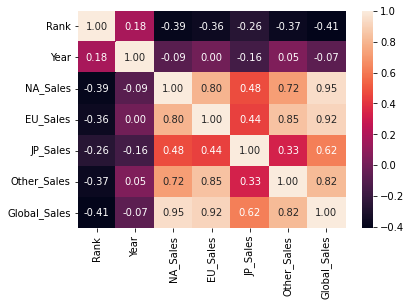

In [89]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [90]:
X = df[['Rank', 'Platform', 'Year', 'Genre', 'Publisher']]

In [91]:
y = df['Global_Sales']

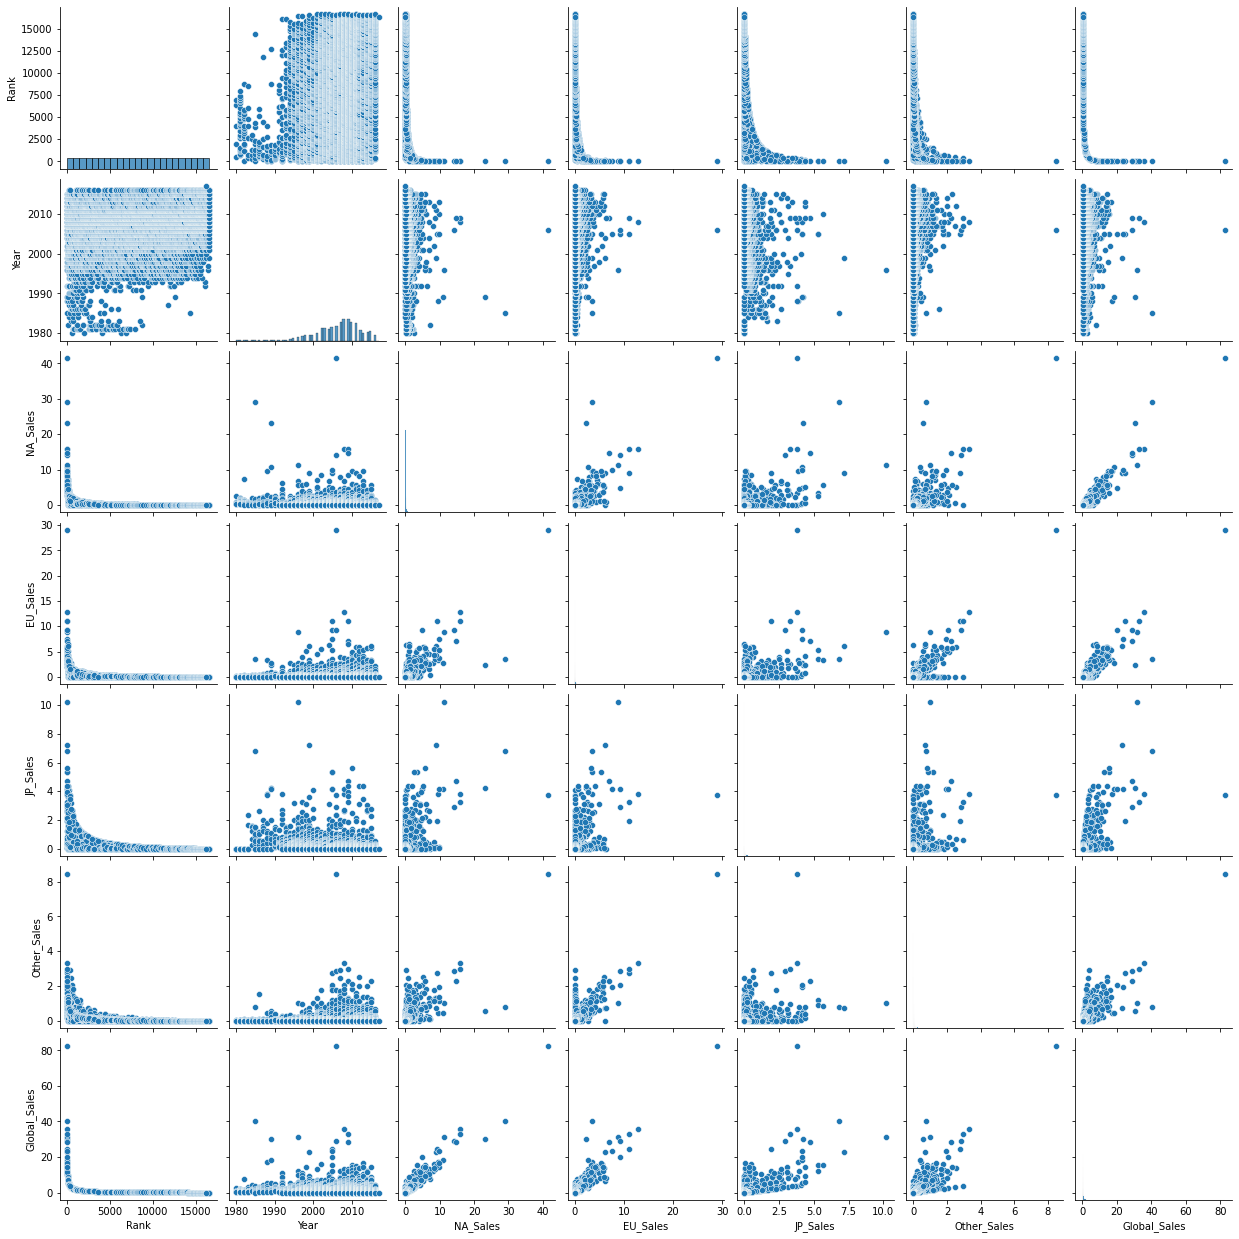

In [ ]:
sns.pairplot(df)

In [92]:
X = pd.get_dummies(X, drop_first=True, )

In [93]:
X.head()

,Rank,Year,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_1C Company,Publisher_20th Century Fox Video Games,Publisher_2D Boy,Publisher_3DO,Publisher_49Games,Publisher_505 Games,Publisher_5pb,Publisher_7G//AMES,Publisher_989 Sports,Publisher_989 Studios,Publisher_AQ Interactive,Publisher_ASCII Entertainment,Publisher_ASCII Media Works,Publisher_Acclaim Entertainment,Publisher_Accolade,Publisher_Ackkstudios,Publisher_Acquire,Publisher_Activision,Publisher_Activision Blizzard,Publisher_Activision Value,Publisher_Aerosoft,Publisher_Agatsuma Entertainment,Publisher_Agetec,Publisher_Aksys Games,Publisher_Alawar Entertainment,Publisher_Alchemist,Publisher_Alternative Software,Publisher_Alvion,Publisher_Angel Studios,Publisher_Aqua Plus,Publisher_Arc System Works,Publisher_Arena Entertainment,Publisher_Arika,Publisher_ArtDink,Publisher_Aruze Corp,Publisher_Ascaron Entertainment,Publisher_Ascaron Entertainment GmbH,Publisher_Asgard,Publisher_Asmik Ace Entertainment,Publisher_Asmik Corp,Publisher_Aspyr,Publisher_Astragon,Publisher_Asylum Entertainment,Publisher_Atari,Publisher_Athena,Publisher_Atlus,Publisher_Avalon Interactive,Publisher_Avanquest,Publisher_Avanquest Software,Publisher_Axela,Publisher_BAM! Entertainment,Publisher_BMG Interactive Entertainment,Publisher_BPS,Publisher_Banpresto,Publisher_Benesse,Publisher_Berkeley,Publisher_Bethesda Softworks,Publisher_Big Ben Interactive,Publisher_Big Fish Games,Publisher_Bigben Interactive,Publisher_Black Bean Games,Publisher_Black Label Games,Publisher_Blast! Entertainment Ltd,Publisher_Blue Byte,Publisher_Bohemia Interactive,Publisher_Brash Entertainment,Publisher_Broccoli,Publisher_BushiRoad,Publisher_CBS Electronics,Publisher_CDV Software Entertainment,Publisher_CTO SpA,Publisher_Capcom,Publisher_Cave,Publisher_ChunSoft,Publisher_City Interactive,Publisher_Cloud Imperium Games Corporation,Publisher_Coconuts Japan,Publisher_Codemasters,Publisher_Coleco,Publisher_Comfort,Publisher_Compile,Publisher_Compile Heart,Publisher_Conspiracy Entertainment,Publisher_Core Design Ltd.,Publisher_Crave Entertainment,Publisher_Creative Core,Publisher_Crimson Cow,Publisher_Crystal Dynamics,Publisher_Culture Brain,Publisher_Culture Publishers,Publisher_CyberFront,Publisher_Cygames,Publisher_D3Publisher,Publisher_DHM Interactive,Publisher_DSI Games,Publisher_DTP Entertainment,Publisher_Daedalic,Publisher_Daedalic Entertainment,Publisher_Daito,Publisher_Data Age,Publisher_Data Design Interactive,Publisher_Deep Silver,"Publisher_Destination Software, Inc",Publisher_Destineer,Publisher_Detn8 Games,Publisher_Devolver Digital,Publisher_Disney Interactive Studios,Publisher_Dorart,Publisher_DreamCatcher Interactive,Publisher_DreamWorks Interactive,Publisher_Dusenberry Martin Racing,Publisher_EA Games,Publisher_EON Digital Entertainment,Publisher_ESP,Publisher_Easy Interactive,Publisher_Ecole,Publisher_Edia,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Electronic Arts Victor,Publisher_Elf,Publisher_Elite,Publisher_Empire Interactive,Publisher_Encore,Publisher_Enix Corporation,Publisher_Enjoy Gaming ltd.,Publisher_Enterbrain,Publisher_Epic Games,Publisher_Epoch,Publisher_Ertain,Publisher_Essential Games,Publisher_Evolution Games,Publisher_Evolved Games,Publisher_Excalibur Publishing,Publisher_Experience Inc.,Publisher_Extreme Entertainment Group,Publisher_Falcom Corporation,Publisher_Fields,Publisher_Flight-Plan,Publisher_Focus Home Interactive,Publisher_Focus Multimedia,Publisher_Foreign Media Games,Publisher_Fox Inte

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [94]:
model = LinearRegression()

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [96]:
scaler = RobustScaler()

In [97]:
linear_model = make_pipeline(scaler, model)

In [98]:
linear_model.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('linearregression', LinearRegression())])

In [99]:
pred = linear_model.predict(X_test)

In [100]:
from sklearn.metrics import r2_score, mean_squared_error

In [101]:
r2_score(y_test, pred)

-3.713633126211829e+20

In [102]:
ridge_model = Ridge()

In [103]:
param_grid = {'ridge__alpha': [1, 2, 5, 10]}

In [104]:
rid_model = make_pipeline(scaler, ridge_model)

In [105]:
grid_search = GridSearchCV(rid_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [1, 2, 5, 10]})

In [106]:
grid_model = grid_search.best_estimator_

In [107]:
grid_model.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()), ('ridge', Ridge(alpha=10))])

In [108]:
pred = grid_model.predict(X_test)

In [109]:
r2_score(y_test, pred)

0.2908456084841813

In [110]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

In [111]:
svr = SVR()

In [ ]:
param_grid = {'svr__kernel' : ['linear', 'poly', 'rbf'], 'svr__degree': [2,3,4], 'svr__C':[0.5, 1, 10], }

In [112]:
svr_model = make_pipeline(scaler, svr)

In [113]:
svr_model.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()), ('svr', SVR())])

In [114]:
pred = svr_model.predict(X_test)

In [115]:
r2_score(y_test, pred)

0.35320038698806533

In [116]:
xgb_model = xgb.XGBRegressor()

In [117]:
xgbreg_model = make_pipeline(scaler, xgb_model)

In [118]:
xgbreg_model.fit(X_train, y_train)

[11:46:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('robustscaler', RobustScaler()),
                ('xgbregressor', XGBRegressor())])

In [119]:
pred = xgbreg_model.predict(X_test)

In [120]:
r2_score(y_test, pred)

0.9972458027718887

In [121]:
y_test

9398    0.03
7103    0.08
8058    0.04
2538    0.35
9023    0.01
        ... 
3784    0.13
1575    0.75
6953    0.14
45      0.62
775     0.07
Name: Global_Sales, Length: 2206, dtype: float64

In [122]:
pred

array([0.03080177, 0.08023095, 0.04064465, ..., 0.13966274, 0.6304327 ,
       0.07048997], dtype=float32)

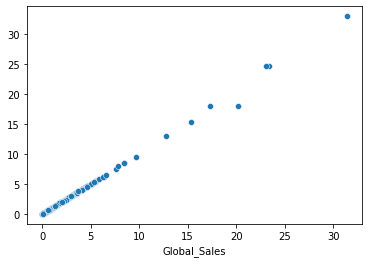

In [123]:
sns.scatterplot(y_test, pred)

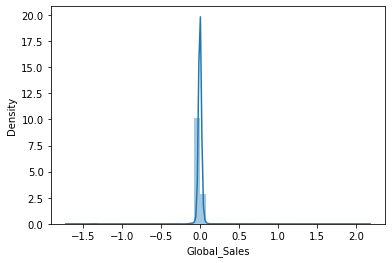

In [124]:
sns.distplot(y_test-pred, kde=True)

In [125]:
np.sqrt(mean_squared_error(y_test, pred))

0.07681428524818328

In [126]:
test_res = y_test - pred

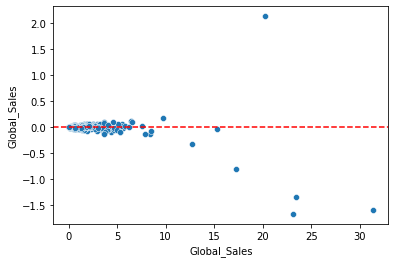

In [127]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

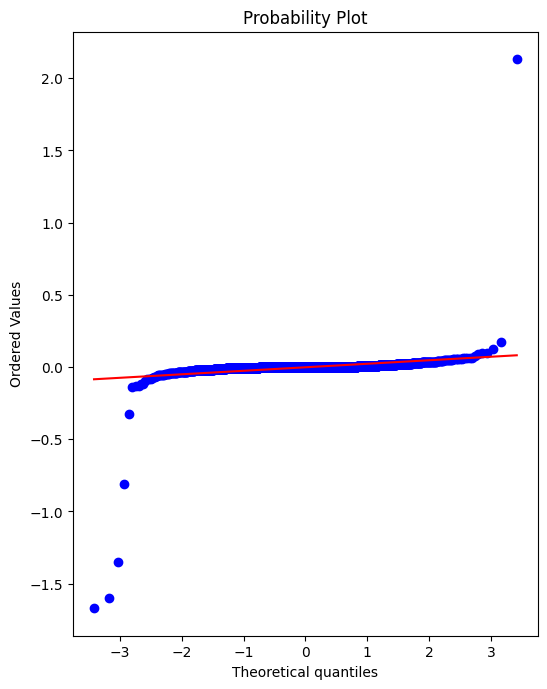

In [128]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_res,plot=ax)

In [129]:
import pickle
with open('model.pkl', 'wb') as file:
  pickle.dump(xgbreg_model, file)  

In [56]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test.csv to test.csv
User uploaded file "test.csv" with length 432663 bytes


In [142]:
test_df = pd.read_csv('test.csv')

In [131]:
with open('model.pkl', 'rb') as file:
  model = pickle.load(file)

[11:47:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [132]:
test_df.isna().sum()

Rank            0
Name            0
Platform        0
Year           98
Genre           0
Publisher      18
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [143]:
test_df['Year'] = test_df['Year'].fillna(sp.stats.mode(test_df['Year'])[0][0])
test_df['Publisher'] = test_df['Publisher'].fillna(sp.stats.mode(test_df['Publisher'])[0][0])

In [135]:
test_df.isna().sum()

Rank           0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [134]:
test_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05
1,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01
2,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01
3,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00
4,240,Pitfall!,2600,1981.0,Platform,Activision,4.21,0.24,0.0,0.05


In [144]:
test_x = test_df[['Rank', 'Platform', 'Year', 'Genre', 'Publisher']]

In [145]:
test_x = pd.get_dummies(test_x,)

In [146]:
test_x = test_x.reindex(columns = X_train.columns, fill_value=0)

In [147]:
test_x.columns

Index(['Rank', 'Year', 'Platform_3DO', 'Platform_3DS', 'Platform_DC',
       'Platform_DS', 'Platform_GB', 'Platform_GBA', 'Platform_GC',
       'Platform_GEN',
       ...
       'Publisher_Zoo Digital Publishing', 'Publisher_Zoo Games',
       'Publisher_Zushi Games', 'Publisher_bitComposer Games',
       'Publisher_dramatic create', 'Publisher_iWin',
       'Publisher_imageepoch Inc.', 'Publisher_inXile Entertainment',
       'Publisher_mixi, Inc', 'Publisher_responDESIGN'],
      dtype='object', length=528)

In [148]:
test_x['Global_Sales'] = model.predict(test_x)

In [149]:
test_x

,Rank,Year,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_1C Company,Publisher_20th Century Fox Video Games,Publisher_2D Boy,Publisher_3DO,Publisher_49Games,Publisher_505 Games,Publisher_5pb,Publisher_7G//AMES,Publisher_989 Sports,Publisher_989 Studios,Publisher_AQ Interactive,Publisher_ASCII Entertainment,Publisher_ASCII Media Works,Publisher_Acclaim Entertainment,Publisher_Accolade,Publisher_Ackkstudios,Publisher_Acquire,Publisher_Activision,Publisher_Activision Blizzard,Publisher_Activision Value,Publisher_Aerosoft,Publisher_Agatsuma Entertainment,Publisher_Agetec,Publisher_Aksys Games,Publisher_Alawar Entertainment,Publisher_Alchemist,Publisher_Alternative Software,Publisher_Alvion,Publisher_Angel Studios,Publisher_Aqua Plus,Publisher_Arc System Works,Publisher_Arena Entertainment,Publisher_Arika,Publisher_ArtDink,Publisher_Aruze Corp,Publisher_Ascaron Entertainment,Publisher_Ascaron Entertainment GmbH,Publisher_Asgard,Publisher_Asmik Ace Entertainment,Publisher_Asmik Corp,Publisher_Aspyr,Publisher_Astragon,Publisher_Asylum Entertainment,Publisher_Atari,Publisher_Athena,Publisher_Atlus,Publisher_Avalon Interactive,Publisher_Avanquest,Publisher_Avanquest Software,Publisher_Axela,Publisher_BAM! Entertainment,Publisher_BMG Interactive Entertainment,Publisher_BPS,Publisher_Banpresto,Publisher_Benesse,Publisher_Berkeley,Publisher_Bethesda Softworks,Publisher_Big Ben Interactive,Publisher_Big Fish Games,Publisher_Bigben Interactive,Publisher_Black Bean Games,Publisher_Black Label Games,Publisher_Blast! Entertainment Ltd,Publisher_Blue Byte,Publisher_Bohemia Interactive,Publisher_Brash Entertainment,Publisher_Broccoli,Publisher_BushiRoad,Publisher_CBS Electronics,Publisher_CDV Software Entertainment,Publisher_CTO SpA,Publisher_Capcom,Publisher_Cave,Publisher_ChunSoft,Publisher_City Interactive,Publisher_Cloud Imperium Games Corporation,Publisher_Coconuts Japan,Publisher_Codemasters,Publisher_Coleco,Publisher_Comfort,Publisher_Compile,Publisher_Compile Heart,Publisher_Conspiracy Entertainment,Publisher_Core Design Ltd.,Publisher_Crave Entertainment,Publisher_Creative Core,Publisher_Crimson Cow,Publisher_Crystal Dynamics,Publisher_Culture Brain,Publisher_Culture Publishers,Publisher_CyberFront,Publisher_Cygames,Publisher_D3Publisher,Publisher_DHM Interactive,Publisher_DSI Games,Publisher_DTP Entertainment,Publisher_Daedalic,Publisher_Daedalic Entertainment,Publisher_Daito,Publisher_Data Age,Publisher_Data Design Interactive,Publisher_Deep Silver,"Publisher_Destination Software, Inc",Publisher_Destineer,Publisher_Detn8 Games,Publisher_Devolver Digital,Publisher_Disney Interactive Studios,Publisher_Dorart,Publisher_DreamCatcher Interactive,Publisher_DreamWorks Interactive,Publisher_Dusenberry Martin Racing,Publisher_EA Games,Publisher_EON Digital Entertainment,Publisher_ESP,Publisher_Easy Interactive,Publisher_Ecole,Publisher_Edia,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Electronic Arts Victor,Publisher_Elf,Publisher_Elite,Publisher_Empire Interactive,Publisher_Encore,Publisher_Enix Corporation,Publisher_Enjoy Gaming ltd.,Publisher_Enterbrain,Publisher_Epic Games,Publisher_Epoch,Publisher_Ertain,Publisher_Essential Games,Publisher_Evolution Games,Publisher_Evolved Games,Publisher_Excalibur Publishing,Publisher_Experience Inc.,Publisher_Extreme Entertainment Group,Publisher_Falcom Corporation,Publisher_Fields,Publisher_Flight-Plan,Publisher_Focus Home Interactive,Publisher_Focus Multimedia,Publisher_Foreign Media Games,Publisher_Fox Inte

In [154]:
test_x['Global_Sales'].to_csv('Mukkesh.csv', index=False)